# Time Series Analysis

In [1]:
import pandas as pd
import numpy as np
import datetime

%matplotlib inline

### Understanding the difference between Python and pandas date tools

In [2]:
date = datetime.date(year=2013, month=6, day=7)
time = datetime.time(hour=12, minute=30, second=19, microsecond=463198)
dt = datetime.datetime(year=2013, month=6, day=7, 
                       hour=12, minute=30, second=19, microsecond=463198)

print("date is ", date)
print("time is", time)
print("datetime is", dt)

date is  2013-06-07
time is 12:30:19.463198
datetime is 2013-06-07 12:30:19.463198


In [3]:
td = datetime.timedelta(weeks=2, days=5, hours=10, minutes=20, 
                        seconds=6.73, milliseconds=99, microseconds=8)
print(td)

19 days, 10:20:06.829008


In [4]:
print('new date is', date + td)
print('new datetime is', dt + td)

new date is 2013-06-26
new datetime is 2013-06-26 22:50:26.292206


In [5]:
time + td

TypeError: unsupported operand type(s) for +: 'datetime.time' and 'datetime.timedelta'

In [ ]:
pd.Timestamp(year=2012, month=12, day=21, hour=5, minute=10, second=8, microsecond=99)

In [6]:
pd.Timestamp('2016/1/10')

Timestamp('2016-01-10 00:00:00')

In [7]:
pd.Timestamp('2014-5/10')

Timestamp('2014-05-10 00:00:00')

In [8]:
pd.Timestamp('Jan 3, 2019 20:45.56')

Timestamp('2019-01-03 20:45:33')

In [9]:
pd.Timestamp('2016-01-05T05:34:43.123456789')

Timestamp('2016-01-05 05:34:43.123456789')

In [10]:
pd.Timestamp(500)

Timestamp('1970-01-01 00:00:00.000000500')

In [11]:
pd.Timestamp(5000, unit='D')

Timestamp('1983-09-10 00:00:00')

In [12]:
pd.to_datetime('2015-5-13')

Timestamp('2015-05-13 00:00:00')

In [13]:
pd.to_datetime('2015-13-5', dayfirst=True)

Timestamp('2015-05-13 00:00:00')

In [14]:
pd.to_datetime('Start Date: Sep 30, 2017 Start Time: 1:30 pm',\
               format='Start Date: %b %d, %Y Start Time: %I:%M %p')

Timestamp('2017-09-30 13:30:00')

In [15]:
pd.to_datetime(100, unit='D', origin='2013-1-1')

Timestamp('2013-04-11 00:00:00')

In [16]:
s = pd.Series([10, 100, 1000, 10000])
pd.to_datetime(s, unit='D')

0   1970-01-11
1   1970-04-11
2   1972-09-27
3   1997-05-19
dtype: datetime64[ns]

In [17]:
s = pd.Series(['12-5-2015', '14-1-2013', '20/12/2017', '40/23/2017'])
pd.to_datetime(s, dayfirst=True, errors='coerce')

0   2015-05-12
1   2013-01-14
2   2017-12-20
3          NaT
dtype: datetime64[ns]

In [18]:
pd.to_datetime(['Aug 3 1999 3:45:56', '10/31/2017'])

DatetimeIndex(['1999-08-03 03:45:56', '2017-10-31 00:00:00'], dtype='datetime64[ns]', freq=None)

In [19]:
pd.Timedelta('12 days 5 hours 3 minutes 123456789 nanoseconds')

Timedelta('12 days 05:03:00.123456')

In [20]:
pd.Timedelta(days=5, minutes=7.34)

Timedelta('5 days 00:07:20.400000')

In [21]:
pd.Timedelta(100, unit='W')

Timedelta('700 days 00:00:00')

In [22]:
pd.to_timedelta('67:15:45.454')

Timedelta('2 days 19:15:45.454000')

In [23]:
s = pd.Series([10, 100])
pd.to_timedelta(s, unit='s')

0   00:00:10
1   00:01:40
dtype: timedelta64[ns]

In [24]:
time_strings = ['2 days 24 minutes 89.67 seconds', '00:45:23.6']
pd.to_timedelta(time_strings)

TimedeltaIndex(['2 days 00:25:29.670000', '0 days 00:45:23.600000'], dtype='timedelta64[ns]', freq=None)

In [25]:
pd.Timedelta('12 days 5 hours 3 minutes') * 2

Timedelta('24 days 10:06:00')

In [26]:
pd.Timestamp('1/1/2017') + pd.Timedelta('12 days 5 hours 3 minutes') * 2

Timestamp('2017-01-25 10:06:00')

In [27]:
td1 = pd.to_timedelta([10, 100], unit='s')
td2 = pd.to_timedelta(['3 hours', '4 hours'])
td1 + td2

TimedeltaIndex(['03:00:10', '04:01:40'], dtype='timedelta64[ns]', freq=None)

In [28]:
pd.Timedelta('12 days') / pd.Timedelta('3 days')

4.0

In [29]:
ts = pd.Timestamp('2016-10-1 4:23:23.9')

In [30]:
ts.ceil('h')

Timestamp('2016-10-01 05:00:00')

In [31]:
ts.year, ts.month, ts.day, ts.hour, ts.minute, ts.second

(2016, 10, 1, 4, 23, 23)

In [32]:
ts.dayofweek, ts.dayofyear, ts.daysinmonth

(5, 275, 31)

In [33]:
ts.to_pydatetime()

datetime.datetime(2016, 10, 1, 4, 23, 23, 900000)

In [34]:
td = pd.Timedelta(125.8723, unit='h')
td

Timedelta('5 days 05:52:20.280000')

In [35]:
td.round('min')

Timedelta('5 days 05:52:00')

In [36]:
td.components

Components(days=5, hours=5, minutes=52, seconds=20, milliseconds=280, microseconds=0, nanoseconds=0)

In [37]:
td.total_seconds()

453140.28

### Slicing time series intelligently

In [38]:
crime = pd.read_hdf('data/crime.h5', 'crime')
crime.dtypes

OFFENSE_TYPE_ID              category
OFFENSE_CATEGORY_ID          category
REPORTED_DATE          datetime64[ns]
GEO_LON                       float64
GEO_LAT                       float64
NEIGHBORHOOD_ID              category
IS_CRIME                        int64
IS_TRAFFIC                      int64
dtype: object

In [39]:
crime = crime.set_index('REPORTED_DATE')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


In [40]:
crime.index[:2]

DatetimeIndex(['2014-06-29 02:01:00', '2014-06-29 01:54:00'], dtype='datetime64[ns]', name='REPORTED_DATE', freq=None)

In [41]:
crime.loc['2016-05-12 16:45:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 16:45:00,traffic-accident,traffic-accident,-104.847024,39.779596,montbello,0,1
2016-05-12 16:45:00,traffic-accident,traffic-accident,-105.049180,39.769296,west-highland,0,1
2016-05-12 16:45:00,fraud-identity-theft,white-collar-crime,-104.931971,39.717359,hilltop,1,0


In [42]:
crime.loc['2016-05-12']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 23:51:00,criminal-mischief-other,public-disorder,-105.017241,39.705845,athmar-park,1,0
2016-05-12 18:40:00,liquor-possession,drug-alcohol,-104.995692,39.747875,cbd,1,0
2016-05-12 22:26:00,traffic-accident,traffic-accident,-104.880037,39.777037,stapleton,0,1
2016-05-12 20:35:00,theft-bicycle,larceny,-104.929350,39.763797,northeast-park-hill,1,0
2016-05-12 09:39:00,theft-of-motor-vehicle,auto-theft,-104.941233,39.775510,elyria-swansea,1,0
2016-05-12 17:39:00,traffic-accident,traffic-accident,-104.943412,39.679424,university-park,0,1
2016-05-12 08:51:00,burglary-business-by-force,burglary,-105.011072,39.763791,highland,1,0
2016-05-12 20:13:00,criminal-mischief-other,public-disorder,-104.899579,39.746814,east-colfax,1,0
2016-05-12 13:23:00,traffic-accident,traffic-accident,-105.025157,39.729322,villa-park,0,1


In [43]:
crime.loc['2016-05'].shape

(8012, 7)

In [44]:
crime.loc['2016'].shape

(91076, 7)

In [45]:
crime.loc['2016-05-12 03'].shape

(4, 7)

In [46]:
crime.loc['Dec 2015'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-12-01 00:48:00,drug-cocaine-possess,drug-alcohol,-104.891681,39.740155,east-colfax,1,0
2015-12-01 00:48:00,theft-of-motor-vehicle,auto-theft,-104.891681,39.740155,east-colfax,1,0
2015-12-01 01:00:00,criminal-mischief-other,public-disorder,-104.993574,39.739773,civic-center,1,0
2015-12-01 01:10:00,traf-other,all-other-crimes,-104.995496,39.725618,baker,1,0
2015-12-01 01:10:00,traf-habitual-offender,all-other-crimes,-104.995496,39.725618,baker,1,0
2015-12-01 01:27:00,traf-other,all-other-crimes,-104.959699,39.745851,city-park,1,0
2015-12-01 01:44:00,extortion,all-other-crimes,-105.041735,39.720193,barnum-west,1,0
2015-12-01 01:44:00,weapon-carrying-prohibited,all-other-crimes,-104.986891,39.756010,five-points,1,0
2015-12-01 01:44:00,weapon-carrying-concealed,all-other-crimes,-104.986891,39.756010,five-points,1,0


In [47]:
crime.loc['2016 Sep, 15'].shape

(252, 7)

In [48]:
crime.loc['21st October 2014 05'].shape

(4, 7)

In [49]:
crime.loc['2015-3-4':'2016-1-1'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-04 00:11:00,assault-dv,other-crimes-against-persons,-105.021966,39.770883,sunnyside,1,0
2015-03-04 00:19:00,assault-dv,other-crimes-against-persons,-104.978988,39.748799,five-points,1,0
2015-03-04 00:27:00,theft-of-services,larceny,-105.055082,39.790564,regis,1,0
2015-03-04 00:49:00,traffic-accident-hit-and-run,traffic-accident,-104.987454,39.701378,washington-park-west,0,1
2015-03-04 01:07:00,burglary-business-no-force,burglary,-105.010843,39.762538,highland,1,0
2015-03-04 01:13:00,traffic-accident-hit-and-run,traffic-accident,-105.020370,39.678657,college-view-south-platte,0,1
2015-03-04 01:20:00,prostitution-engaging-in,public-disorder,-105.040846,39.769239,west-highland,1,0
2015-03-04 01:32:00,traffic-accident,traffic-accident,-104.995620,39.703453,baker,0,1
2015-03-04 02:02:00,agg-aslt-police-weapon,all-other-crimes,-104.972118,39.759491,whittier,1,0


In [50]:
crime.loc['2015-3-4 22':'2016-1-1 11:45:00'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-04 22:25:00,traffic-accident-hit-and-run,traffic-accident,-104.973896,39.769064,five-points,0,1
2015-03-04 22:30:00,traffic-accident,traffic-accident,-104.906412,39.632816,hampden-south,0,1
2015-03-04 22:32:00,traffic-accident-hit-and-run,traffic-accident,-104.979180,39.706613,washington-park-west,0,1
2015-03-04 22:33:00,traffic-accident-hit-and-run,traffic-accident,-104.991655,39.740067,civic-center,0,1
2015-03-04 22:36:00,theft-unauth-use-of-ftd,white-collar-crime,-105.045235,39.667928,harvey-park,1,0
2015-03-04 22:36:00,criminal-mischief-other,public-disorder,-105.045235,39.667928,harvey-park,1,0
2015-03-04 22:42:00,traf-other,all-other-crimes,-104.965955,39.760740,whittier,1,0
2015-03-04 22:43:00,traf-other,all-other-crimes,-104.987579,39.751337,five-points,1,0
2015-03-04 22:43:00,drug-poss-paraphernalia,drug-alcohol,-104.987579,39.751337,five-points,1,0


### Using methods that only work with a DatetimeIndex

In [51]:
crime = pd.read_hdf('data/crime.h5', 'crime').set_index('REPORTED_DATE')
print(type(crime.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [52]:
crime.between_time('2:00', '5:00', include_end=False).head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,-104.972447,39.739449,cheesman-park,1,0


In [53]:
import datetime
crime.between_time(datetime.time(2,0), datetime.time(5,0),
include_end=False).head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,-104.972447,39.739449,cheesman-park,1,0


In [54]:
crime.at_time('5:47').head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2013-11-26 05:47:00,criminal-mischief-other,public-disorder,-104.991476,39.751536,cbd,1,0
2017-04-09 05:47:00,criminal-mischief-mtr-veh,public-disorder,-104.959394,39.678425,university,1,0
2017-02-19 05:47:00,criminal-mischief-other,public-disorder,-104.986767,39.741336,north-capitol-hill,1,0
2017-02-16 05:47:00,aggravated-assault,aggravated-assault,-104.934029,39.732320,hale,1,0
2017-02-12 05:47:00,police-interference,all-other-crimes,-104.976306,39.722644,speer,1,0


In [55]:
crime_sort = crime.sort_index()
crime_sort.first(pd.offsets.MonthBegin(6))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


In [56]:
crime_sort.first(pd.offsets.MonthEnd(6))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


In [57]:
crime_sort.first(pd.offsets.MonthBegin(6, normalize=True))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


In [58]:
crime_sort.loc[:'2012-06']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


In [59]:
crime_sort.first('5D') # 5 days

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


In [60]:
crime_sort.first('5B') # 5 business days

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


In [61]:
crime_sort.first('7W') # 7 weeks, with weeks ending on Sunday

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


In [62]:
crime_sort.first('3QS') # 3rd quarter start

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


In [63]:
crime_sort.first('A') # one year end

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


### Counting the number of weekly crimes

In [64]:
crime_sort = pd.read_hdf('data/crime.h5', 'crime') \
               .set_index('REPORTED_DATE') \
               .sort_index()

In [65]:
crime_sort.resample('W')

DatetimeIndexResampler [freq=<Week: weekday=6>, axis=0, closed=right, label=right, convention=start, base=0]

In [66]:
weekly_crimes = crime_sort.resample('W').size()
weekly_crimes.head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

In [67]:
r = crime_sort.resample('W')
resample_methods = [attr for attr in dir(r) if attr[0].islower()]
print(resample_methods)

['agg', 'aggregate', 'apply', 'asfreq', 'ax', 'backfill', 'bfill', 'count', 'ffill', 'fillna', 'first', 'get_group', 'groups', 'indices', 'interpolate', 'last', 'max', 'mean', 'median', 'min', 'ndim', 'ngroups', 'nunique', 'obj', 'ohlc', 'pad', 'plot', 'prod', 'sem', 'size', 'std', 'sum', 'transform', 'var']


In [68]:
len(crime_sort.loc[:'2012-1-8'])

877

In [69]:
len(crime_sort.loc['2012-1-9':'2012-1-15'])

1071

In [70]:
crime_sort.resample('W-THU').size().head()

REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
2012-01-26    1061
2012-02-02     926
Freq: W-THU, dtype: int64

In [71]:
weekly_crimes_gby = crime_sort.groupby(pd.Grouper(freq='W')).size()
weekly_crimes_gby.head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

In [72]:
weekly_crimes.equals(weekly_crimes_gby)

True

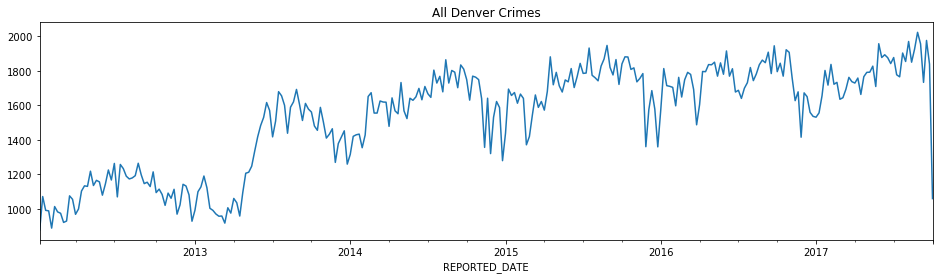

In [73]:
weekly_crimes.plot(figsize=(16, 4), title='All Denver Crimes')